In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [43]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 16

In [44]:
train_dataset = datasets.ImageFolder('./train_medium/', transform=transform)
val_dataset = datasets.ImageFolder('./val_medium/', transform=transform)

In [45]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

classes = ('footway', 'primary')

[tensor([[[[ 0.7098,  0.6627,  0.6333,  ..., -0.1431, -0.1510, -0.2667],
          [ 0.7490,  0.7176,  0.6980,  ..., -0.1804, -0.1608, -0.2333],
          [ 0.7667,  0.7608,  0.7569,  ..., -0.1569, -0.2706, -0.2275],
          ...,
          [-0.7608, -0.7647, -0.7647,  ..., -0.8510, -0.8627, -0.8392],
          [-0.7510, -0.7510, -0.7529,  ..., -0.8392, -0.8471, -0.8196],
          [-0.7412, -0.7392, -0.7373,  ..., -0.8392, -0.8549, -0.8314]],

         [[ 0.9294,  0.8824,  0.8529,  ...,  0.0961,  0.0922, -0.0235],
          [ 0.9765,  0.9451,  0.9255,  ...,  0.0569,  0.0824,  0.0098],
          [ 0.9941,  0.9882,  0.9843,  ...,  0.0843, -0.0157,  0.0275],
          ...,
          [-0.5804, -0.5843, -0.5922,  ..., -0.7333, -0.7451, -0.7216],
          [-0.5745, -0.5784, -0.5863,  ..., -0.7216, -0.7294, -0.7020],
          [-0.5686, -0.5784, -0.5882,  ..., -0.7216, -0.7373, -0.7137]],

         [[ 1.0000,  0.9686,  0.9392,  ...,  0.1471,  0.1196, -0.0078],
          [ 1.0000,  0.9961, 

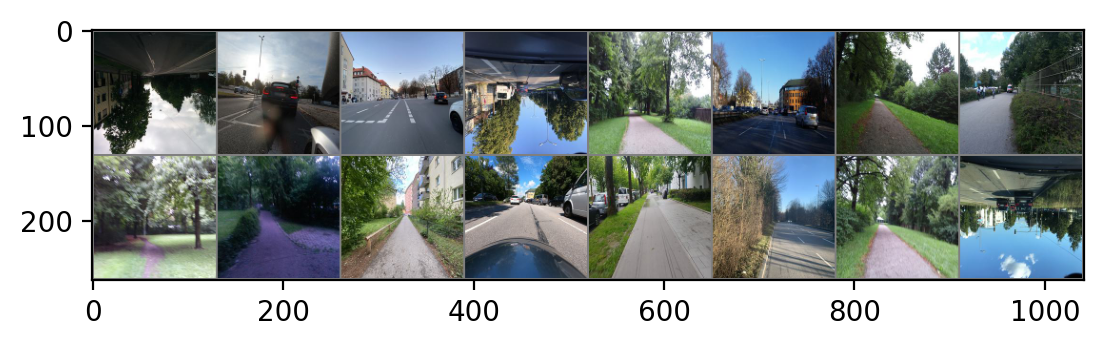

primary primary footway primary footway primary footway footway footway footway footway primary footway primary footway primary
torch.Size([3, 128, 128])


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
print(next(dataiter))
print(len(next(dataiter)))
images, labels = next(dataiter)
print(labels)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(images[0].shape)

In [47]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 3 input image channel, 6 output channels, 5x5 square convolution

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 29 * 29, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [48]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [49]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()        
        if i % 20 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 0.692
[2,    20] loss: 0.691
[3,    20] loss: 0.689
[4,    20] loss: 0.684
[5,    20] loss: 0.680
[6,    20] loss: 0.665
[7,    20] loss: 0.642
[8,    20] loss: 0.614
[9,    20] loss: 0.570
[10,    20] loss: 0.524
Finished Training


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [50]:
PATH = './test_0.pth'
torch.save(net.state_dict(), PATH)

a torch.Size([3, 262, 1042])


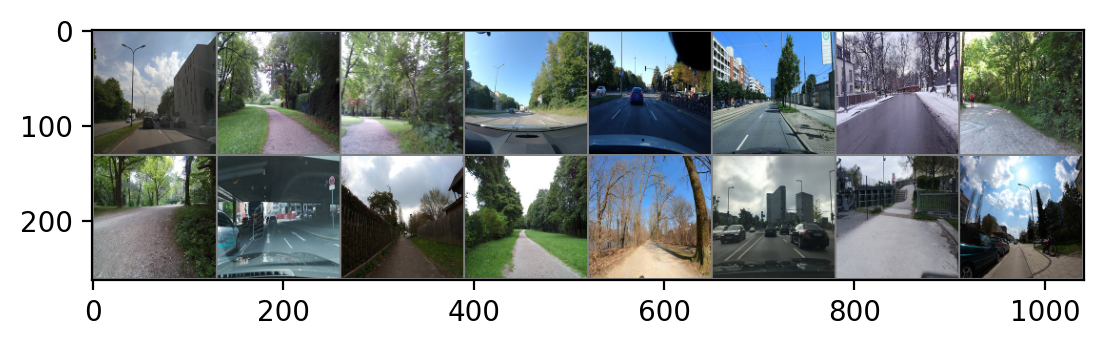

GroundTruth:  primary footway footway primary primary primary footway footway footway primary footway footway footway primary footway footway


In [56]:
dataiter = iter(val_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [57]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [58]:
outputs = net(images)

a torch.Size([3, 262, 1042])


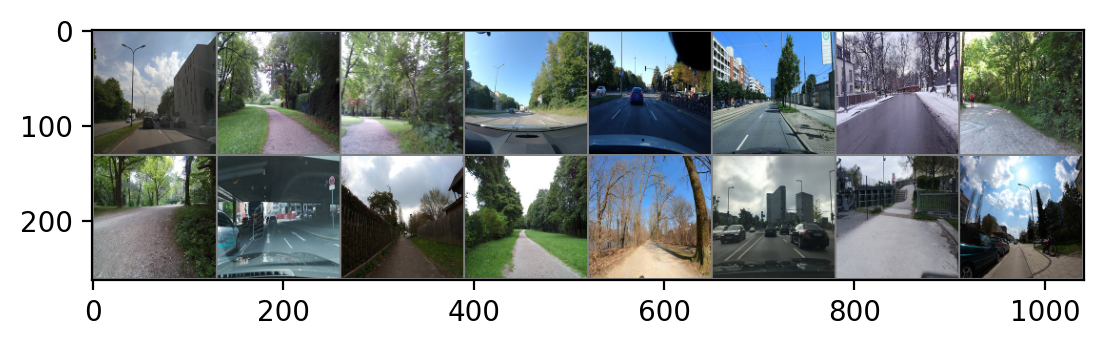

GroundTruth:  primary footway footway primary primary primary footway footway footway primary footway footway footway primary footway footway
Predicted:  primary footway footway primary primary primary footway footway footway footway footway footway footway primary footway footway


In [60]:
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [62]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 79 %
